<a href="https://colab.research.google.com/github/EmmanuelChinkaka/EChinkaka0/blob/main/GEOG271/Map_by_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Refer GeoPandas 0.9.0 at https://geopandas.org/index.html and Part 1 - Introduction to Geographic Data Science.ipynb at https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb#scrollTo=A91qAwyjOTs8
!apt install gdal-bin python-gdal python3-gdal #install geopython libraries
!apt install python3-rtree #install python3-rtree - Geopandas requirement
!pip install git+git://github.com/geopandas/geopandas.git #install geopandas
!pip install descartes #install descartes - Geopandas requirement

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 4 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (6,301 kB/s)
Selecting previously unselected 

In [7]:
#import tools: NumPy for Advanced linear algebra, Matplotlib for Visualization and data plotting, Pandas for Data manipulation and analysis, Geopandas for programming geospatial data in python,  matplotlib.pyplot for plotting map
!pip install geopandas
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.6 MB/s 
     |████████████████████████████████| 6.3 MB 53.8 MB/s 
     |████████████████████████████████| 16.7 MB 856 kB/s 


In [8]:
#Read the world data and show the header
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [9]:
#Read the capitals data and show the header
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


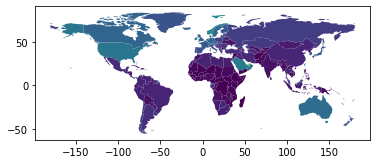

In [10]:
#plot a Map of GDP per capita without using pyplot
world = world[(world.pop_est>0) & (world.name!="Antarctica")] #exclude negative population and Antarctica
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

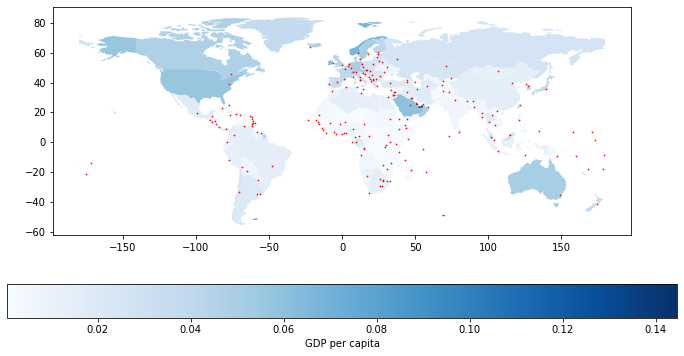

In [11]:
#Use pyplot (plt) to plot a world map with capital markers and shaded by gdp per capita with a scale bar
fig, ax = plt.subplots(figsize=(12,6))
world.plot(column='gdp_per_cap', cmap='Blues', ax=ax, legend=True, legend_kwds={'label': "GDP per capita", 'orientation': "horizontal"})
capitals.plot(markersize=0.5, color='red', ax=ax)
plt.show()

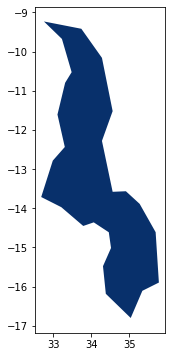

In [13]:
#Use pyplot (plt) to plot a country map such as New Zealand 
fig, ax_nz = plt.subplots(figsize=(8,6))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Malawi"].plot(cmap='Blues_r', ax=ax_nz)
plt.show()